# Data Story Notebook
This is the Jupyter notebook for the 'Data Story' portion of my first Springboard capstone project. The goal of this project is to create a model that predicts what decade a song is form based on its lyrical content. This will be where I do my exploratory data analysis of the lyrical content of the lyrics of the songs, and of the data in general.

In [100]:
# Importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from collections import Counter
from nltk.util import ngrams
import seaborn as sns
import nltk
import os
sns.set()

To start with, we will import the data and visualize large parts of the data. Insteresting things to look at will be numbers of songs per year, most common artists, and most common words from songs overall and by decades. We will start with looking at the biggest possible pictures in the data.

In [101]:
# importing the data
songs = pd.read_csv("clean_songs.csv")
songs = songs.drop(columns='Unnamed: 0')
songs.head()

,Rank,Song,Artist,Year,Lyrics,Decade
0,1,wooly bully,sam the sham and the pharaohs,1965,sam the sham miscellaneous wooly bully wooly b...,1960
1,2,i cant help myself sugar pie honey bunch,four tops,1965,sugar pie honey bunch you know that i love yo...,1960
2,4,you were on my mind,we five,1965,when i woke up this morning you were on my mi...,1960
3,5,youve lost that lovin feelin,the righteous brothers,1965,you never close your eyes anymore when i kiss...,1960
4,6,downtown,petula clark,1965,when youre alone and life is making you lonel...,1960


# Looking at the Big Picture
Cleaning the data resulted in dropping a few songs from each year so the first few things we will look at is counting what is going on with the data overall. how many songs do we have for each year? for each rank?

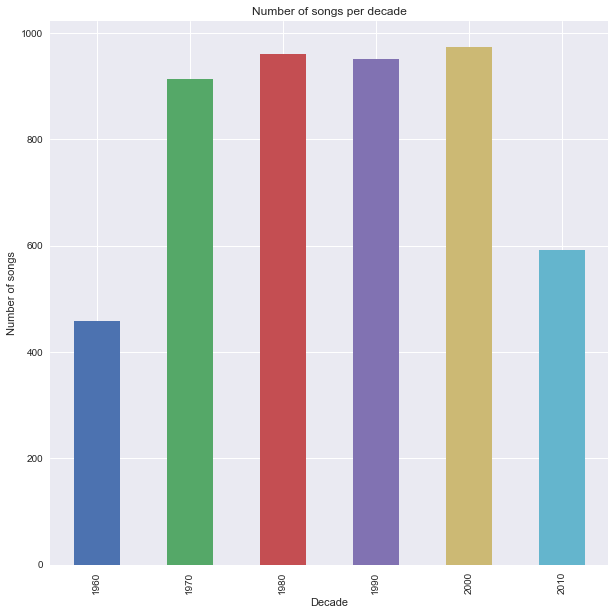

In [102]:
# visualizing songs per year
plt.rcParams["figure.figsize"] = (10,10)
songs.groupby('Decade').size().plot.bar()
plt.title('Number of songs per decade')
plt.xlabel('Decade')
plt.ylabel('Number of songs')
plt.show()

Looking at this graph, we see that we have not lost too many songs from each decade after cleaning the data. The most obvious discrepencies we can observe here are that the 1960's has a bit less than 500 songs, and the 2010's have a bit less than 600 songs. These are both expected from how the data was originally constructed, with the years 1965-2015.

Text(0,0.5,'Counts')

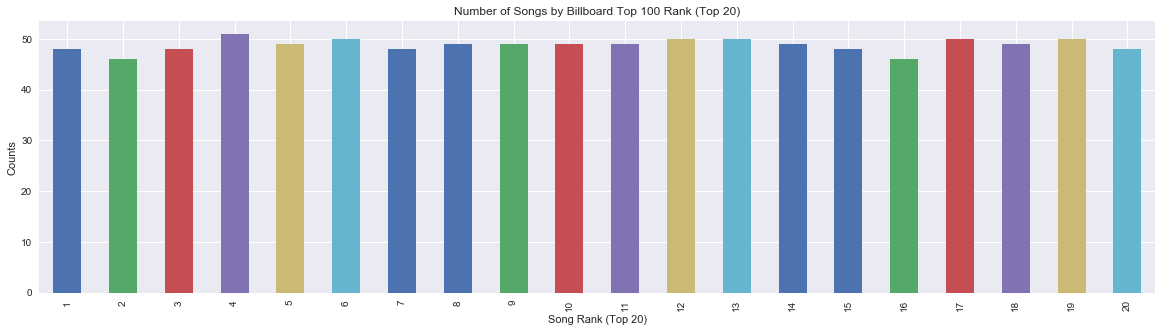

In [214]:
plt.rcParams["figure.figsize"] = (20,5)
songs.groupby('Rank').size().head(20).plot.bar()
plt.title('Number of Songs by Billboard Top 100 Rank (Top 20)')
plt.xlabel('Song Rank (Top 20)')
plt.ylabel('Counts')

Looking at counts of the top twenty ranks, we see that the top twenty ranks have not been too adversely affected by the data cleaning procedure. I can observe that rank 4 has 51 songs for some reason, which is an interesting error in the data. Fortunately only a two of the first 20 ranks are missing more than two or three songs.

Text(0,0.5,'Songs in Data')

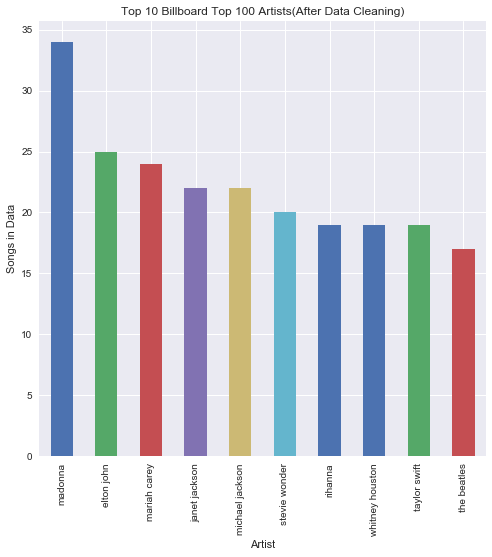

In [104]:
plt.rcParams["figure.figsize"] = (8,8)
top_art = songs.groupby('Artist').size().sort_values(ascending=False).head(10).plot.bar()
plt.title('Top 10 Billboard Top 100 Artists(After Data Cleaning)')
plt.ylabel('Songs in Data')

Viewing the most common artists and when they were popular may be interesting, as the fact that some artitsts completely dominate charts and my have their own lyrical styles may affect the lyrical content of certain decades.

# Breaking it down
Now we are going to start breaking down to data into its minutia in order to start making observations of lyrical content. We will be looking at lyrical content as a whole, then by decade.

The following functions are functions that will be used to process the data in the rest of the document.

In [105]:
# To start with, we will tokenize the lyrics and preprocess the words, removing stopwords and non alphabetical terms
def preprocess(string):
    """Tokenizes and lowercases a string, removing non-alpha words and stop words."""    
    tok = word_tokenize(string)
    tok = [t.lower() for t in tok]
    tok = [t for t in tok if t.isalpha()]
    stop_words = stopwords.words('english')
    data_stops = ['im', 'dont', 'youre', 'na', 'oh', 'ill']
    tok = [t for t in tok if t not in stop_words]
    tok = [t for t in tok if t not in data_stops]
    return tok

In [106]:
# A function to create n gram dataframes
def n_grammer(tokens, n):
    """takes the tokens as they are formatted in the dataframe and returns a new data frame of n-grams"""
    counts = dict()
    for song in tokens:
        n_grams = ngrams(song, n)
        grams = [ ' '.join(g) for g in n_grams]
        for word in grams:
            if word in counts:
                counts[word] += 1
            else:
                counts[word] = 1
    counts_df =  pd.DataFrame.from_dict(counts, orient='index', columns=['counts'])
    counts_df = counts_df.sort_values(by='counts', ascending=False)
    return counts_df

In [107]:
#A function that generates wordcount dataframes
def wordcounts(data):
    """Takes a list of lists of words and generates a word counter from those tokens."""
    counts = dict()
    for song in data:
        words = song
        for word in words:
            if word in counts:
                counts[word] += 1
            else:
                counts[word] = 1
    counts_df =  pd.DataFrame.from_dict(counts, orient='index', columns=['counts'])
    counts_df = counts_df.sort_values(by='counts', ascending=False)
    return counts_df

In [108]:
# Creating a tokens column for the data
songs['Tokens'] = songs['Lyrics'].apply(preprocess)

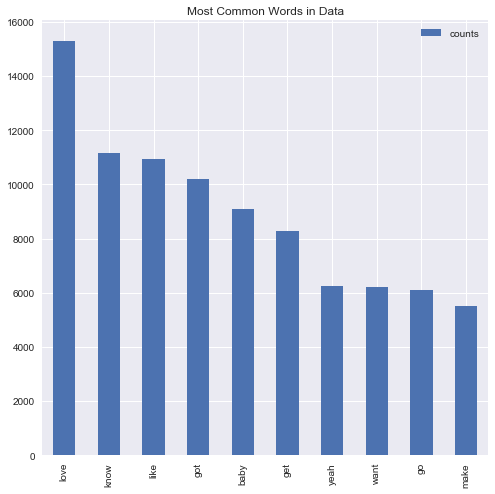

In [109]:
#calculating wordcounts for all of the words in the data
plt.rcParams["figure.figsize"] = (8,8)
all_words = wordcounts(songs['Tokens'])
all_words.head(10).plot.bar(title='Most Common Words in Data')

In [110]:
#defining some variables so that they can be used later in the code more efficiently
six = songs[songs.Decade==1960]
sev = songs[songs.Decade==1970]
eig = songs[songs.Decade==1980]
nin = songs[songs.Decade==1990]
aut = songs[songs.Decade==2000]
ten = songs[songs.Decade==2010]

In [111]:
#Calculating wordcounts for each of the decades respectively
sixties= wordcounts(six['Tokens'])
seventies = wordcounts(sev['Tokens'])
eighties = wordcounts(eig['Tokens'])
nineties = wordcounts(nin['Tokens'])
auts = wordcounts(aut['Tokens'])
teens = wordcounts(ten['Tokens'])

# Wordcount Plots by Decade

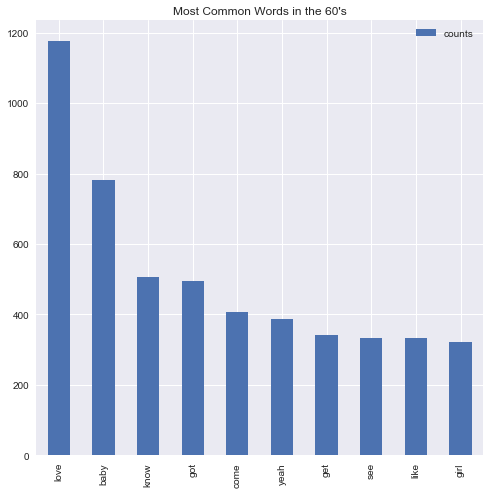

In [112]:
sixties.head(10).plot.bar(title="Most Common Words in the 60's")

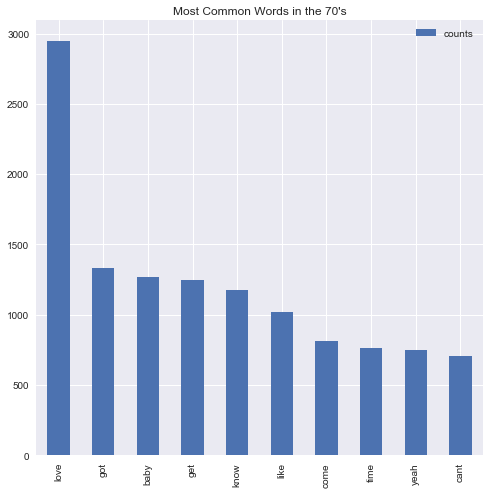

In [113]:
seventies.head(10).plot.bar(title="Most Common Words in the 70's")

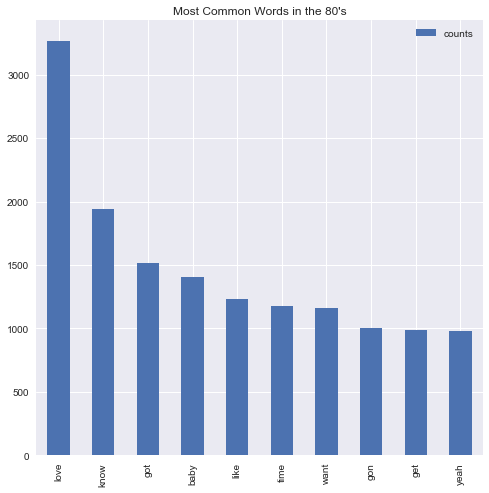

In [114]:
eighties.head(10).plot.bar(title="Most Common Words in the 80's")

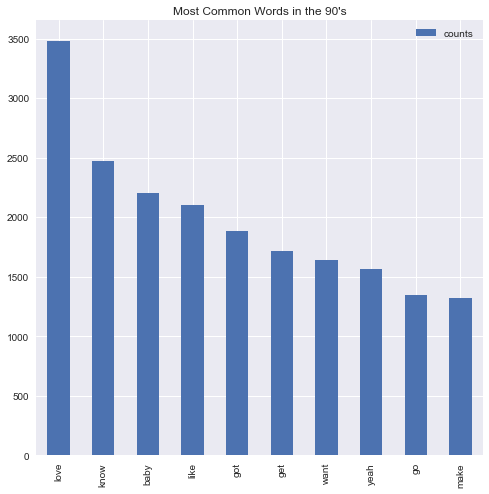

In [115]:
nineties.head(10).plot.bar(title="Most Common Words in the 90's")

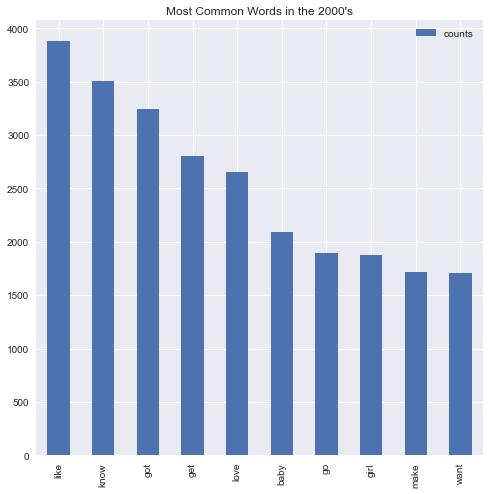

In [116]:
auts.head(10).plot.bar(title="Most Common Words in the 2000's")

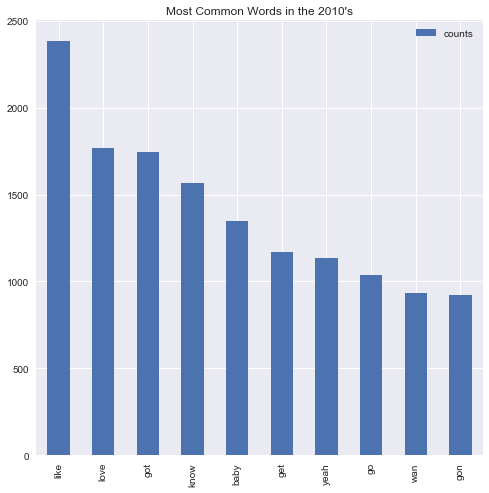

In [117]:
teens.head(10).plot.bar(title="Most Common Words in the 2010's")

After observing the most common word counts of years without stop words, it seems the ten most common words for each decade are very similar. This may be somewhat troubling for model construction as the point of the project is to build an algorithm that predicts decade of a song by its lyrics. The following section will contain wordclouds by decade, that may be able to provide a better insight into the most popular words by decade, and then we will look at the most common n-grams by decade.

# Wordclouds

In [184]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

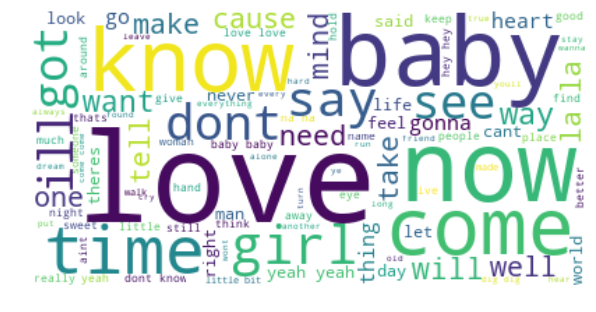

In [205]:
# set up wordcloud text
text_six= " ".join(lyrics for lyrics in six.Lyrics)
stopwords = set(STOPWORDS)
stopwords.update(['oh', 'im', 'youre'])
# generate wordcloud
wordcloud = WordCloud(stopwords=stopwords, max_words=100, background_color="white").generate(text_six)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

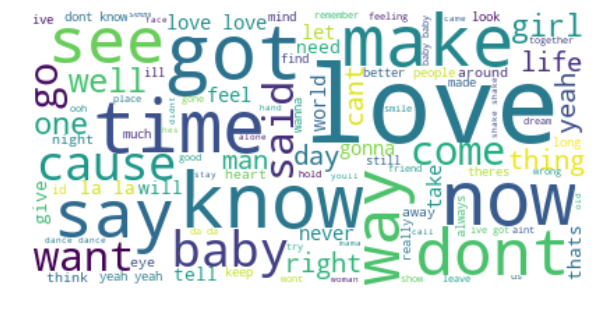

In [206]:
# set up wordcloud text
text_sev= " ".join(lyrics for lyrics in sev.Lyrics)

# generate wordcloud
wordcloud = WordCloud(stopwords=stopwords, max_words=100, background_color="white").generate(text_sev)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

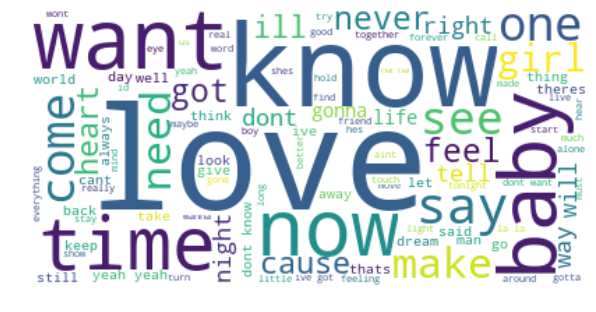

In [207]:
# set up wordcloud text
text_eig= " ".join(lyrics for lyrics in eig.Lyrics)

# generate wordcloud
wordcloud = WordCloud(stopwords=stopwords, max_words=100, background_color="white").generate(text_eig)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

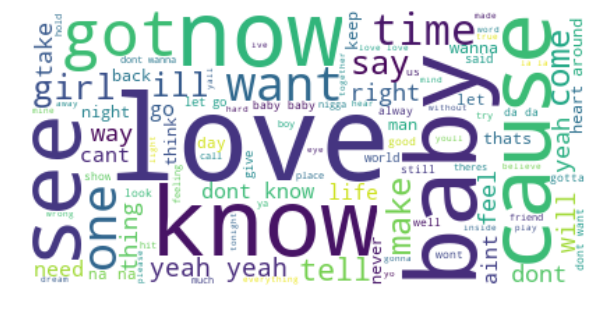

In [208]:
# set up wordcloud text
text_nin= " ".join(lyrics for lyrics in nin.Lyrics)

# generate wordcloud
wordcloud = WordCloud(stopwords=stopwords, max_words=100, background_color="white").generate(text_nin)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# WARNING: The next two wordclouds may contain words some may find offensive. 

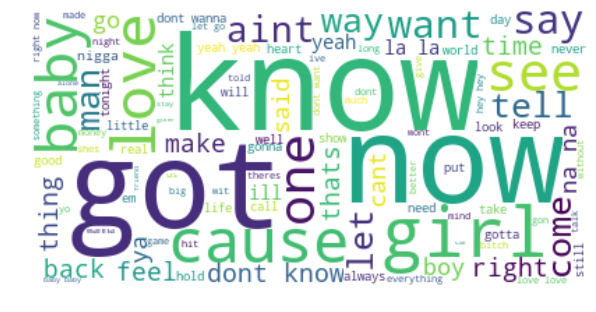

In [209]:
# set up wordcloud text
text_aut= " ".join(lyrics for lyrics in aut.Lyrics)

# generate wordcloud
wordcloud = WordCloud(stopwords=stopwords, max_words=100, background_color="white").generate(text_aut)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

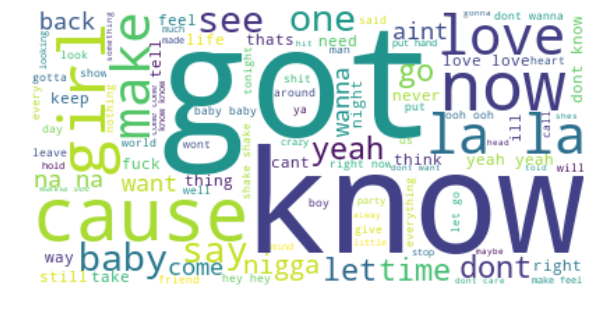

In [210]:
# set up wordcloud text
text_ten= " ".join(lyrics for lyrics in ten.Lyrics)

# generate wordcloud
wordcloud = WordCloud(stopwords=stopwords, max_words=100, background_color="white").generate(text_ten)

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# On Word Clouds
The words clouds unfortunately don't give us too strong of a story as to what may cause differences by decade in terms of lyrics, as many of the largest words in the cloud are common across decades. These clouds do give us a sense of how some of the lower count words have changed in usage over time, but there are more effective ways of representing that, such as tf-idf values, which we will look into later.

# Generating n-grams by Decade
The next section will be on creating n-grams from the text and looking at the most common n-grams by decade. n-grams are constructed by recording occurens of words in sequence of the size of n.

Example: 'the quick brown fox'
When split into n=2 n-grams is: 'the quick', 'quick brown', 'brown fox'.

In [182]:
#calculating n=2 grams for data without stopwords
sixties_2 = n_grammer(six['Tokens'], 2)
seventies_2 = n_grammer(sev['Tokens'], 2)
eighties_2 = n_grammer(eig['Tokens'], 2)
nineties_2 = n_grammer(nin['Tokens'], 2)
auts_2 = n_grammer(aut['Tokens'], 2)
teens_2 = n_grammer(ten['Tokens'], 2)

D:\Ana\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: generator 'ngrams' raised StopIteration
  import sys


# n=2 n-grams by Decade

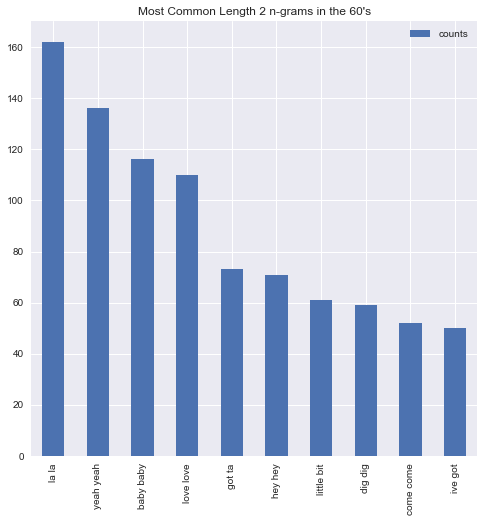

In [119]:
sixties_2.head(10).plot.bar(title="Most Common Length 2 n-grams in the 60's")

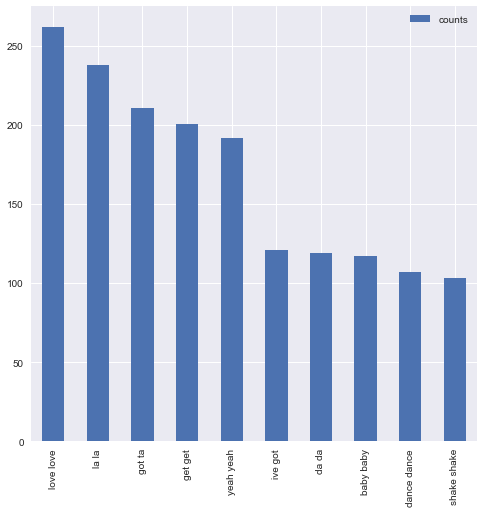

In [120]:
seventies_2.head(10).plot.bar()

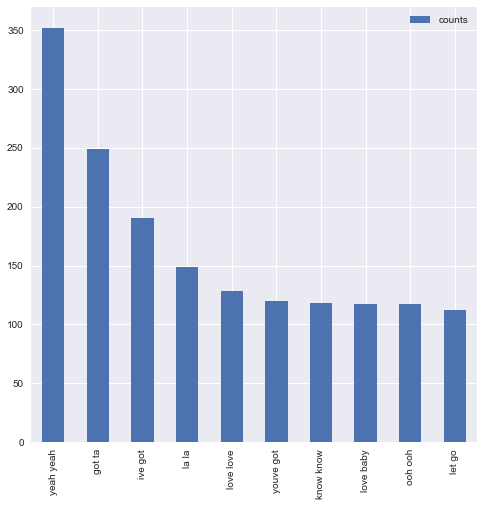

In [121]:
eighties_2.head(10).plot.bar()

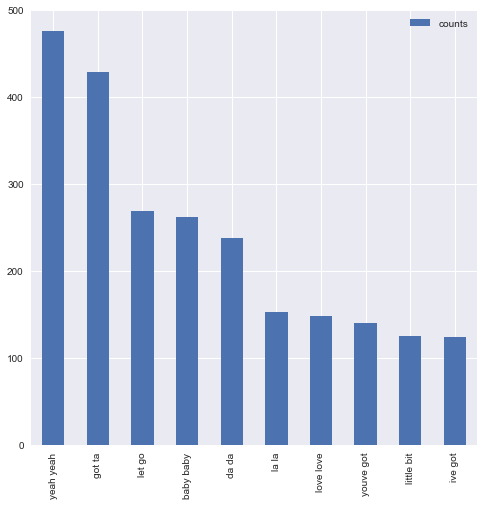

In [122]:
nineties_2.head(10).plot.bar()

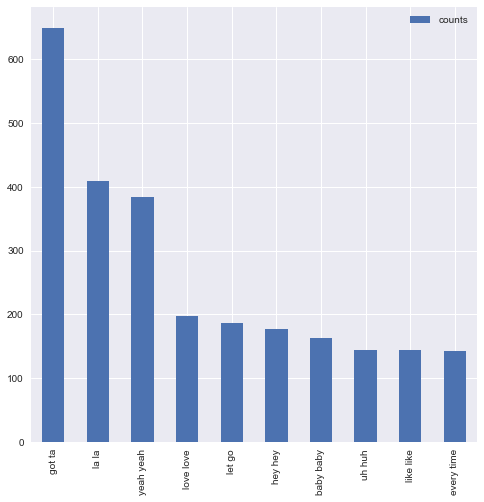

In [123]:
auts_2.head(10).plot.bar()

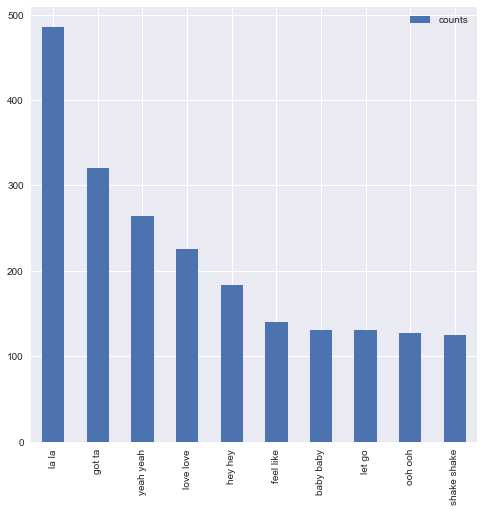

In [124]:
teens_2.head(10).plot.bar()

In [125]:
#calculating n=3 grams for data without stopwords
sixties_3 = n_grammer(six['Tokens'], 3)
seventies_3 = n_grammer(sev['Tokens'], 3)
eighties_3 = n_grammer(eig['Tokens'], 3)
nineties_3 = n_grammer(nin['Tokens'], 3)
auts_3 = n_grammer(aut['Tokens'], 3)
teens_3 = n_grammer(ten['Tokens'], 3)

D:\Ana\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: generator 'ngrams' raised StopIteration
  import sys


# n=3 n-grams by Decade

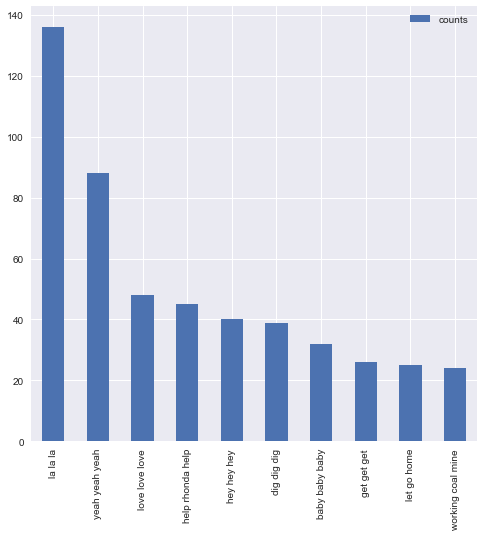

In [126]:
sixties_3.head(10).plot.bar()

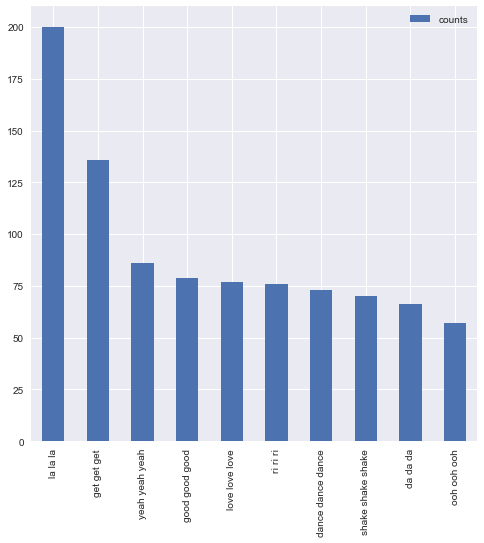

In [127]:
seventies_3.head(10).plot.bar()

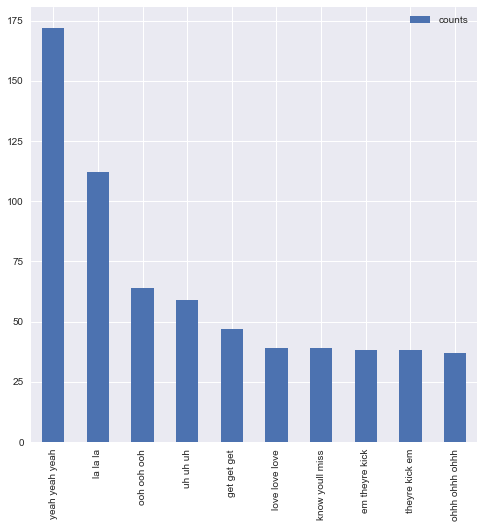

In [128]:
eighties_3.head(10).plot.bar()

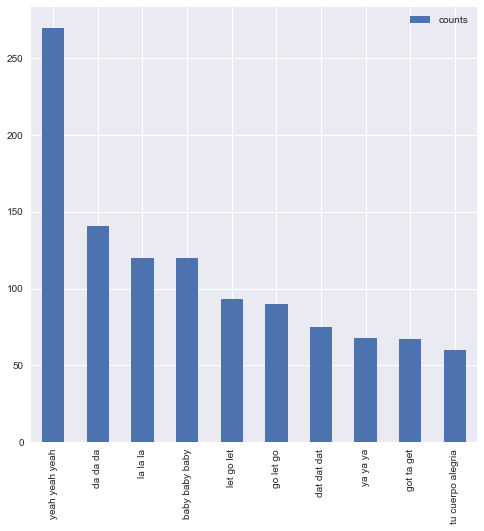

In [129]:
nineties_3.head(10).plot.bar()

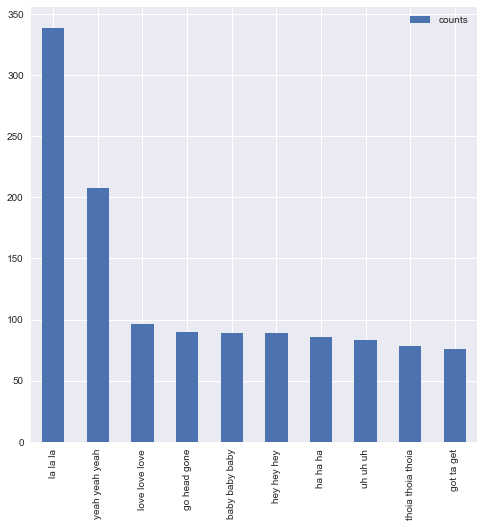

In [130]:
auts_3.head(10).plot.bar()

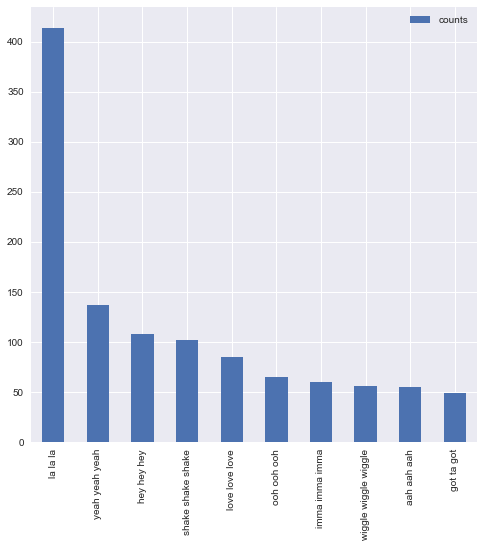

In [131]:
teens_3.head(10).plot.bar()

These two sets of n-gram graphs do give us a bit more insight into the data that we have access to. They are still quite similar across decades. The next step will be to compute Term frequency-inverse document frequency(tf-idf) values for our data in an effort to compute some more meaningful features for our data. Were this project being done in industry, the n-grams would be extracted as features for a model, however due to the number of features this would generate, I've been advised by my mentor not to pull the n-gram data out as features, due to the additional load it might put on my computer/increase in calculation time these features would incur.


# Creating tf-idf data
The following code generates tf-idf data for the lyrics of the songs using a vectorizer from scikit-learn.

In [133]:
#Importing and creating a vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
vect = TfidfVectorizer(stop_words = stopwords.words('english'))

In [134]:
# fitting the vectorizer to the data
X = vect.fit_transform(songs.Lyrics)

In [135]:
#extracting column names from a vectorizer
col_names = vect.get_feature_names()

In [136]:
#creating a dataframe from the tf-idf vectorizer
tf_frame = pd.SparseDataFrame(X, columns=col_names)

In [137]:
tf_frame.head()

,0120,02,03,04,07,082,10,100,1000,100000,...,zoowap,zound,zs,zsa,zu,zucchinis,zulu,zum,zwei,ìê
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Working with tf-idf data
As can be observed from the above dataframe, the tf-idf data has several problems that will need to be adressed. The first thing I will do is try to remove nonsense words and words that do not occur in enough songs to be consequential to the analysis at all. Then, I will do some simple observations of the tf-idf values, to see what information that may reveal.

In [138]:
# Setting up data for na counts from the tf-idf dataframe
na_data = pd.DataFrame(tf_frame.isna().sum().reset_index())
na_data.columns = ['words', 'na_counts']

In [139]:
# sorting by counts to set up a visualiztion
sorted_counts = na_data.sort_values(by='na_counts')
top10 = sorted_counts.head(10)

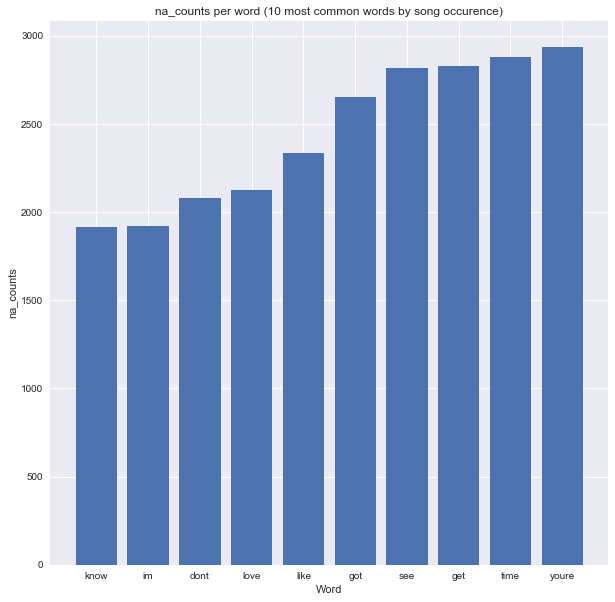

In [212]:
plt.bar(top10['words'], top10['na_counts'])
plt.title("na_counts per word (10 most common words by song occurence)")
plt.xlabel('Word')
plt.ylabel('na_counts')
plt.show()

Here we observe the most common words and the numbers of songs they don't occur in from our dataset(which has 4851 songs). There are currently thousands of words in the data here that only occur in one song, typically because they are a typo. The next thing that I am going to do is perform some processes to take care of removing these words as well as removing some extra obvious mistakes from the words in order to try to clean the data a bit and make future models a bit more accurate by reducing some of the noise they will see.

I am going to quickly remove all columns in the data starting with 'you'. 'You' is a stopword and was removed before the vectorizer did anything, but there are many columns in the data that are words that start with 'you' and have extra text attached to them, which were not dropped when the vectorizer ran.

In [141]:
# Making it a bit easier to deal with data in na_counts by assigning them to easier variables
na_counts = na_data['na_counts']
words = na_data['words']

In [142]:
# importing re to do regex on the colun list
import re

In [143]:
# Generate a list of all potential drop columns containing 'you'
you_likes = [ re.findall('\Ayou.*', x) for x in words if re.findall('\Ayou.*', x) != [] ]
# Turn the list of lists into a list
you_likes = [word for li in you_likes for word in li]
# Drop actual english words pertaining to young which were picked up
youngs = ['young', 'younger', 'youngest', 'youngster']
you_likes = [x for x in you_likes if x not in youngs]

In [144]:
#dropping the 'you' words from the dataset
tf_frame = tf_frame.drop(you_likes, axis=1)

In [145]:
#redefining some variables so that the functions I wrote can still work
na_data = pd.DataFrame(tf_frame.isna().sum().reset_index())
na_data.columns = ['words', 'na_counts']

In [146]:
na_counts = na_data['na_counts']
words = na_data['words']

In [147]:
#finding all the values which only occer in one song
miss1 = [n == 4850 for n in na_counts]

In [148]:
#a function to help with dropping columns from our dataframe
def get_dropnames(bools, names):
    drop_names = []
    i = 0
    for x in bools:
        if x == True:
            drop_names.append(names[i])
        i += 1
    return(drop_names)

In [149]:
# the list of column names to drop
drop1names = get_dropnames(miss1, words)

In [150]:
#droppping those names from that frame
drop1 = tf_frame.drop(drop1names, axis=1)

In [151]:
drop1.shape

(4851, 15350)

Dropping the values that only occured in one song resulted in more than twenty thousand words being dropped immediately. This tells me that the vectorizer pulled out a lot of nonsense words and typos that each only occured once throughout the dataset. With so many words removed so easily after removing the words that only occured once, I will now observe what happens if the drop words that occur in ten songs or less in the data. 

In [152]:
# obtaining the names to drop and dropping them from the dataframe
miss10 = [n >= 4840 for n in na_counts]
drop10names = get_dropnames(miss10, words)

In [153]:
drop10 = tf_frame.drop(drop10names, axis=1)

In [154]:
drop10.shape

(4851, 3211)

In [155]:
drop10.head()

,10,100,12,2x,40,50,aah,able,accept,aching,...,yes,yesterday,yet,yo,york,young,younger,yup,zero,zone
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


So now we see that after we drop the words that occur in ten or fewer songs, we have the list of words in the dataframe down to 3211. Based on advice from my mentor as well as my own intuition of not wanting to take my data apart too much, I'm now going to remove just the numeric words still remaining in the dataset, as well as the 'aah' nonsense word, and then move forward with pulling a story out of the tf-idf data.

In [156]:
drop_cols = ['10', '100', '12', '2x','40', '50', 'aah']
drop10_clean = drop10.drop(drop_cols, axis=1)

In [157]:
drop10_clean.head()

,able,accept,aching,across,act,actin,acting,action,add,addicted,...,yes,yesterday,yet,yo,york,young,younger,yup,zero,zone
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Analyzing the Big Picture of Some tf-idf Values
We can now see that we are down to 3204 words in the dataset. Now I am going to add the decades to this dataset and see if there is any insight that we may gleam from looking at these tf-idf values.

In [158]:
#setting up the data, giving the dataset a better name
tf_data = drop10_clean
tf_data['Decade'] = songs['Decade']

In [159]:
tf_means = tf_data.groupby('Decade').mean()

In [160]:
tf_means.head(6)

,able,accept,aching,across,act,actin,acting,action,add,addicted,...,yes,yesterday,yet,yo,york,young,younger,yup,zero,zone
Decade,,,,,,,,,,,,,,,,,,,,,
1960,0.040107,0.144582,0.115053,0.075088,NaN,NaN,0.134952,0.043722,0.120963,0.121915,...,0.082893,0.079387,0.066519,0.053905,0.111216,0.093750,0.264799,NaN,NaN,NaN
1970,0.072805,0.107684,0.070046,0.090655,0.057976,0.092045,0.081884,0.115360,0.063974,NaN,...,0.074515,0.100169,0.073064,0.037759,0.168439,0.084623,0.076529,NaN,0.076262,0.055773
1980,0.054884,0.101790,0.115272,0.081669,0.055286,0.090301,0.067876,0.095783,0.099544,0.330186,...,0.072971,0.066129,0.057237,0.037923,0.116079,0.054169,0.076051,NaN,0.182176,0.136266
1990,0.093371,0.098730,0.052430,0.057417,0.036666,0.032788,0.046418,0.085232,0.074983,0.107249,...,0.070178,0.078594,0.053269,0.052644,0.040825,0.037457,0.031798,0.036907,0.035690,0.036472
2000,0.054042,0.041872,0.042188,0.061553,0.063488,0.042909,0.053968,0.061941,0.039757,0.090376,...,0.058363,0.077830,0.072507,0.055618,0.075630,0.046607,0.140396,0.034609,0.067312,0.041895
2010,0.044883,0.074868,0.144469,0.046009,0.058817,0.091898,0.051554,0.040371,0.076508,0.107927,...,0.066654,0.058875,0.057675,0.062122,0.097289,0.069510,0.050444,0.032430,0.046409,0.140640


Now that we have the mean tf-idf of each word in the dataframe, we can attempt to oberve what the highest values by decade are in the dataset. This may give us some more in-depth insight into the lyrical differences between decades.

Text(0,0.5,'Love tf-idf Value')

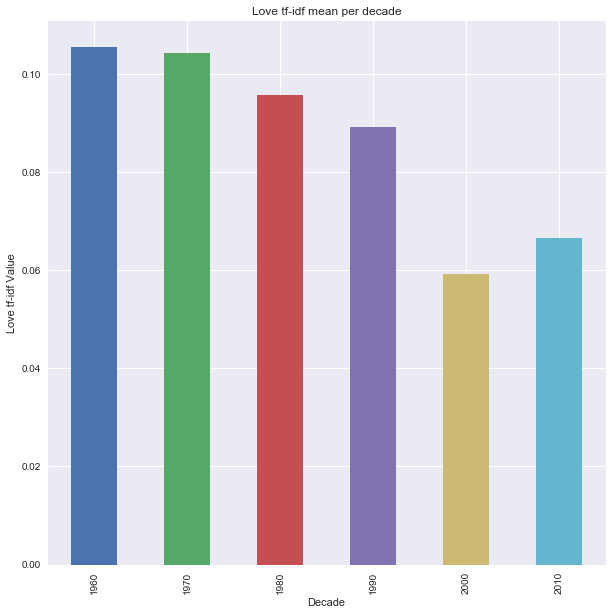

In [161]:
plt.rcParams["figure.figsize"] = (10,10)
plt_1 = tf_means['love'].plot.bar(title='Love tf-idf mean per decade')
plt_1.set_ylabel('Love tf-idf Value')

The first thing I wanted to observe here was "how did the most popular word in the dataset change over time?" We already observered numerical differences in how many times the word love appeared over the decades, but this plot also seems to confirm it with a more meaningful numerical value than how many times the word occured. I'd also like to look at 'know' and 'like' to observe hor their specific tf-idf's may vary by decade.

Text(0,0.5,'Know tf-idf Value')

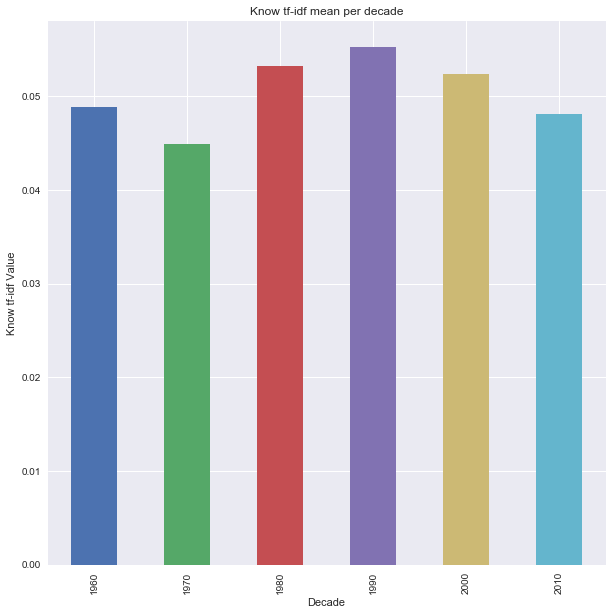

In [162]:
plt_2 = tf_means['know'].plot.bar(title='Know tf-idf mean per decade')
plt_2.set_ylabel('Know tf-idf Value')

Text(0,0.5,'Like tf-idf Value')

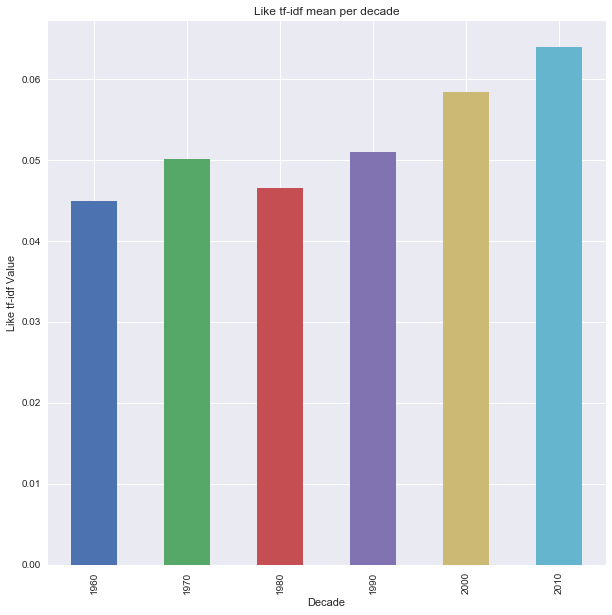

In [163]:
plt_3 = tf_means['like'].plot.bar(title='Like tf-idf mean per decade')
plt_3.set_ylabel('Like tf-idf Value')

Observing the graphs for 'know' and 'like' it seems like 'know' is fairly consistent by decade, while 'like' has become slightly more important across decades, but the increase in 'like' is not as drastic as the decrease in 'love' across decades. Now I will look for some more overall generalizations in the data, specifically what are the largest tf-idf means by decade? Will this be more descriptive than just word count for identifying differences in decades?

# Top Ten Mean tf-idf Values By Decade

Text(0.5,0,'Word')

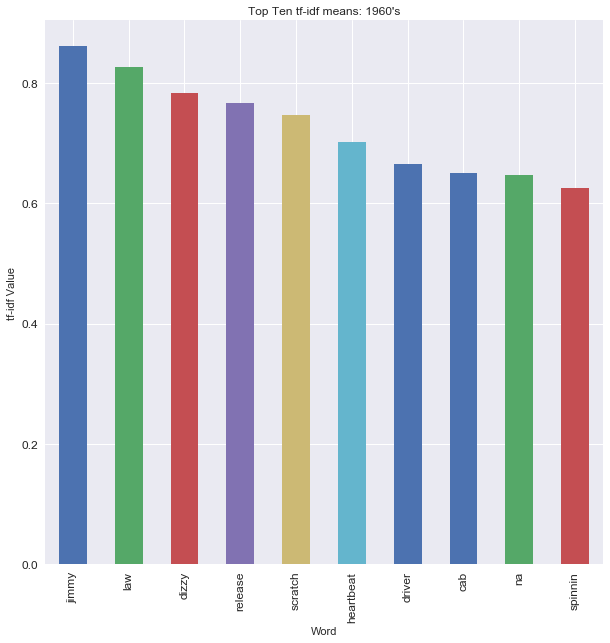

In [171]:
sixtf = tf_means.iloc[0].nlargest(10).sort_values(ascending=False).plot.bar(title="Top Ten tf-idf means: 1960's", fontsize=12)
sixtf.set_ylabel('tf-idf Value')
sixtf.set_xlabel('Word')

Text(0.5,0,'Word')

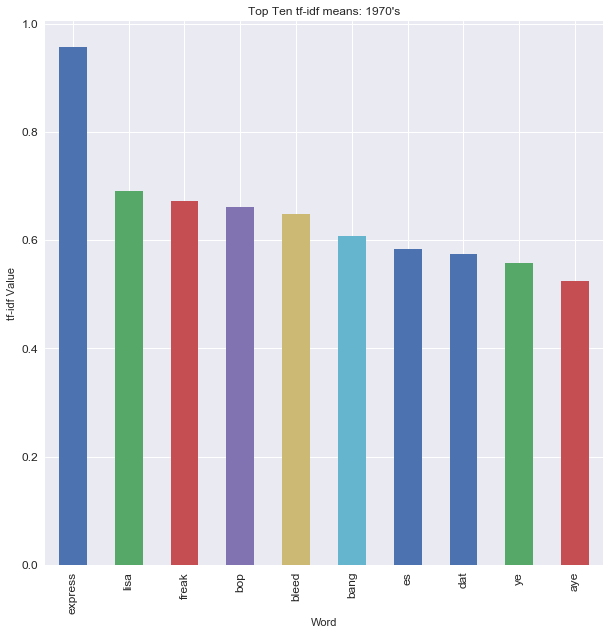

In [165]:
sevtf = tf_means.iloc[1].nlargest(10).sort_values(ascending=False).plot.bar(title="Top Ten tf-idf means: 1970's", fontsize=12)
sevtf.set_ylabel('tf-idf Value')
sevtf.set_xlabel('Word')

Text(0.5,0,'Word')

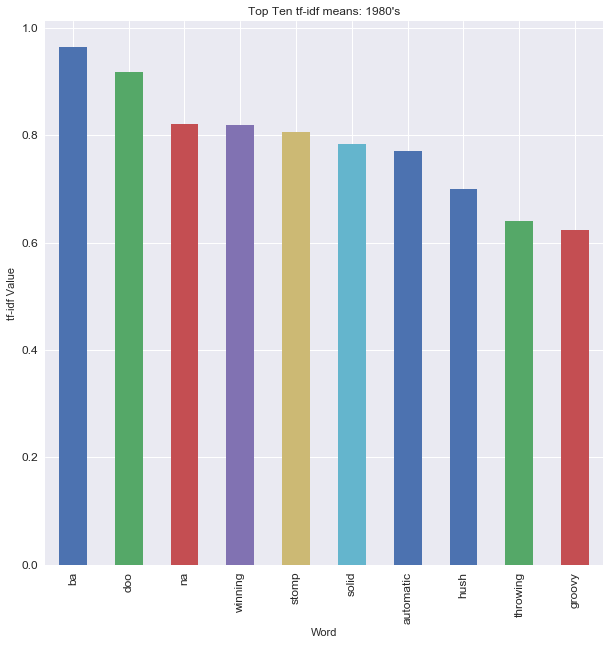

In [166]:
eigtf = tf_means.iloc[2].nlargest(10).sort_values(ascending=False).plot.bar(title="Top Ten tf-idf means: 1980's", fontsize=12)
eigtf.set_ylabel('tf-idf Value')
eigtf.set_xlabel('Word')

Text(0.5,0,'Word')

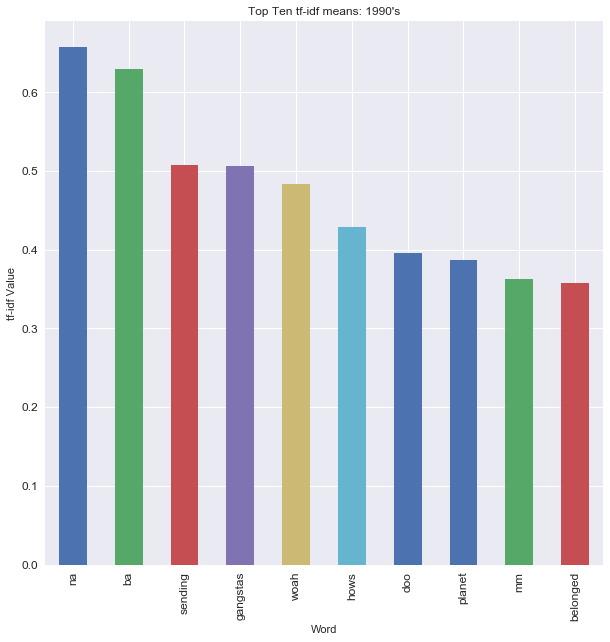

In [167]:
nintf = tf_means.iloc[3].nlargest(10).sort_values(ascending=False).plot.bar(title="Top Ten tf-idf means: 1990's", fontsize=12)
nintf.set_ylabel('tf-idf Value')
nintf.set_xlabel('Word')

Text(0.5,0,'Word')

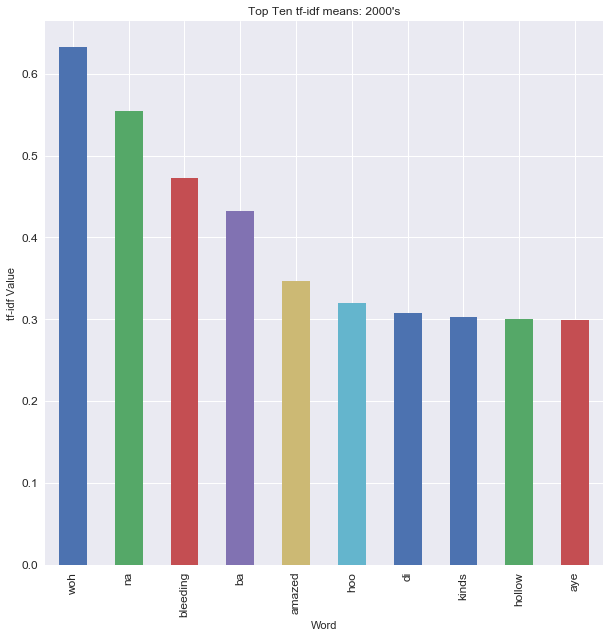

In [168]:
auttf = tf_means.iloc[4].nlargest(10).sort_values(ascending=False).plot.bar(title="Top Ten tf-idf means: 2000's", fontsize=12)
auttf.set_ylabel('tf-idf Value')
auttf.set_xlabel('Word')

Text(0.5,0,'Word')

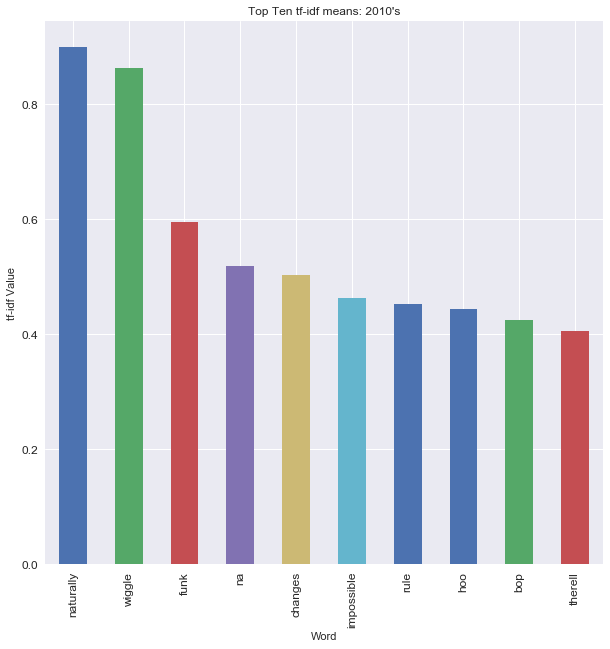

In [169]:
tentf = tf_means.iloc[5].nlargest(10).sort_values(ascending=False).plot.bar(title="Top Ten tf-idf means: 2010's", fontsize=12)
tentf.set_ylabel('tf-idf Value')
tentf.set_xlabel('Word')

# Conclusion
These new plots of tf-idf means by decade seem to show a much more meaningful and measurable difference between decades than any of the other methods that we have used to try to find general lyrical differences across decades. It is very possible that these plots can be missleading, as since we are using the mean, it is possible that some of these words simply occur many times in only a few songs, and therefore aren't actually exemplary of the decade as a whole. I will now move forward to doing some exploratory data analysis on these values, in order to see how meaningful these values actually are in the grand scheme of our model. Hopefully, these values will be significantly differenct enough across decades that they will be goof features for a model to use to predict what decade a song is from.

In [213]:
# exporting data and tf-idf data for use in data analysis notebook
songs.to_csv('basedata.csv')
tf_data.to_csv('tfdata.csv')